In [1]:
import geopandas as gpd
import earthpy as et
import shapefile
from shapely.geometry import shape, Point
import pyproj
import pandas as pd
import numpy as np

In [2]:
spatialData = gpd.read_file(r'idn_admbnda_adm2_bps_20200401.shp')

In [3]:
spatialData.head(1)

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,2.360029,0.228968,Aceh Barat,ID1107,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ..."


In [4]:
spatialData = spatialData[['Shape_Leng', 'Shape_Area', 'ADM2_EN', 'ADM1_EN', 'ADM0_EN', 'geometry']]

In [5]:
spatialData.rename(columns={ 'ADM2_EN':'Kabupaten', 'ADM1_EN':'Province', 'ADM0_EN':'Country'}, inplace=True)

In [6]:
import matplotlib.pyplot as plt

In [7]:
Jawa_Timur=spatialData[spatialData['Province']=="Jawa Timur"]

<AxesSubplot:>

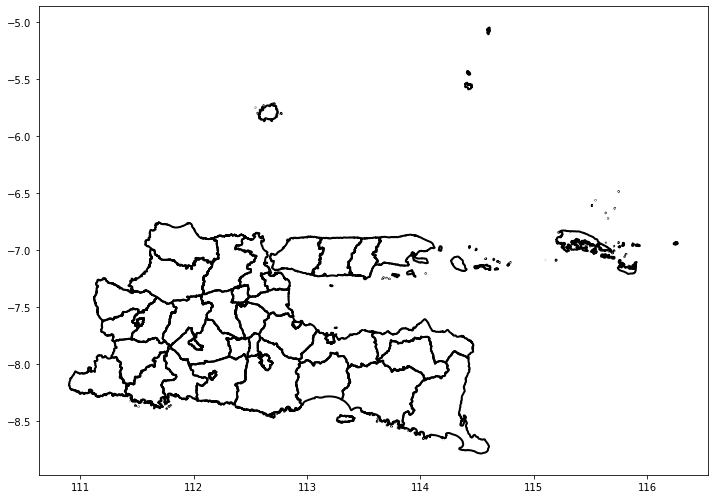

In [8]:
Jawa_Timur.boundary.plot(figsize=(12,12), color='Black', linewidth=2)

In [9]:
Jawa_Timur.head()

,Shape_Leng,Shape_Area,Kabupaten,Province,Country,geometry
26,1.902703,0.106667,Bangkalan,Jawa Timur,Indonesia,"POLYGON ((113.03600 -6.87967, 113.03668 -6.879..."
34,4.156921,0.295777,Banyuwangi,Jawa Timur,Indonesia,"MULTIPOLYGON (((114.20384 -8.65725, 114.20366 ..."
58,2.794290,0.143908,Blitar,Jawa Timur,Indonesia,"MULTIPOLYGON (((112.23872 -8.35230, 112.23880 ..."
62,3.215403,0.189461,Bojonegoro,Jawa Timur,Indonesia,"POLYGON ((111.63838 -6.99566, 111.63868 -6.995..."
68,2.209729,0.127557,Bondowoso,Jawa Timur,Indonesia,"POLYGON ((114.01140 -7.76254, 114.01194 -7.762..."


In [10]:
Jawa_Timur=Jawa_Timur.set_index("Kabupaten")

In [11]:
Opportunity=pd.read_excel("Kabupaten Opportunity-Jawa Timur.xlsx")

In [12]:
Opportunity.head()

,Kabupaten,Number of Stores,Opportunity,Population,Population_Density,Total_Area,Total Sales Avg,Total Store
0,Bangkalan,488,144989077,1168468,883,1323,225766193,6951
1,Banyuwangi,1442,-85262810,1860548,506,3680,675615286,20045
2,Blitar,1273,144152260,1697317,948,1790,394406967,20072
3,Bojonegoro,1034,337327914,1700021,723,2351,202089293,19247
4,Bondowoso,398,182724751,1006362,635,1586,136594233,10736


In [13]:
Jawa_Timur= Jawa_Timur.merge(Opportunity, on="Kabupaten")

In [14]:
Jawa_Timur['Opportunity_Classification']=""

In [15]:
for i in range(len(Jawa_Timur)):
    if Jawa_Timur.loc[i]['Opportunity']>=250000000:
        Jawa_Timur['Opportunity_Classification'][i]="High"
    elif Jawa_Timur.loc[i]['Opportunity']>=100000000 and Jawa_Timur.loc[i]['Opportunity'] < 250000000:
        Jawa_Timur['Opportunity_Classification'][i]="Medium"
    elif Jawa_Timur.loc[i]['Opportunity']>=50000000 and Jawa_Timur.loc[i]['Opportunity'] < 100000000:
        Jawa_Timur['Opportunity_Classification'][i]="Low"
    else:
        Jawa_Timur['Opportunity_Classification'][i]="Very Low"

C:\Users\AKHILE~1.ANA\AppData\Local\Temp/ipykernel_16892/1070877223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jawa_Timur['Opportunity_Classification'][i]="Medium"
C:\Users\AKHILE~1.ANA\AppData\Local\Temp/ipykernel_16892/1070877223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jawa_Timur['Opportunity_Classification'][i]="Very Low"
C:\Users\AKHILE~1.ANA\AppData\Local\Temp/ipykernel_16892/1070877223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [16]:
opp_flag = {'Medium':2, 'Very Low':0, 'High':3, 'Low':1}
Jawa_Timur['Opportunity_flag'] = Jawa_Timur['Opportunity_Classification'].replace(opp_flag)

In [17]:
Jawa_Timur

,Kabupaten,Shape_Leng,Shape_Area,Province,Country,geometry,Number of Stores,Opportunity,Population,Population_Density,Total_Area,Total Sales Avg,Total Store,Opportunity_Classification,Opportunity_flag
0,Bangkalan,1.902703,0.106667,Jawa Timur,Indonesia,"POLYGON ((113.03600 -6.87967, 113.03668 -6.879...",488,144989077,1168468,883,1323,225766193,6951,Medium,2
1,Banyuwangi,4.156921,0.295777,Jawa Timur,Indonesia,"MULTIPOLYGON (((114.20384 -8.65725, 114.20366 ...",1442,-85262810,1860548,506,3680,675615286,20045,Very Low,0
2,Blitar,2.794290,0.143908,Jawa Timur,Indonesia,"MULTIPOLYGON (((112.23872 -8.35230, 112.23880 ...",1273,144152260,1697317,948,1790,394406967,20072,Medium,2
3,Bojonegoro,3.215403,0.189461,Jawa Timur,Indonesia,"POLYGON ((111.63838 -6.99566, 111.63868 -6.995...",1034,337327914,1700021,723,2351,202089293,19247,High,3
4,Bondowoso,2.209729,0.127557,Jawa Timur,Indonesia,"POLYGON ((114.01140 -7.76254, 114.01194 -7.762...",398,182724751,1006362,635,1586,136594233,10736,Medium,2
5,Gresik,3.660272,0.102515,Jawa Timur,Indonesia,"MULTIPOLYGON (((112.55104 -6.84673, 112.55359 ...",1038,-71973788,1322404,1040,1271,491573000,13725,Very Low,0
6,Jember,4.254722,0.271343,Jawa Timur,Indonesia,"MULTIPOLYGON (((113.81802 -8.56293, 113.81799 ...",769,536673462,2955274,876,3375,401035923,25013,High,3
7,Jombang,1.974318,0.091806,Jawa Timur,Indonesia,"POLYGON ((112.33495 -7.34572, 112.33499 -7.345...",882,1476029,1648103,1446,1140,521467580,15719,Very Low,0
8,Kediri,2.682543,0.124862,Jawa Timur,Indonesia,"POLYGON ((112.12161 -7.60675, 112.12184 -7.606...",1454,-45435953,1779463,1147,1552,610060132,18229,Very Low,0
9,Kota Batu,0.698177,0.016095,Jawa Timur,Indonesia,"POLYGON ((112.53523 -7.72512, 112.53550 -7.725...",194,-54437661,196442,982,200,116768770,2405,Very Low,0


In [ ]:
#import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
#from matplotlib.patches import Polygon

C:\Users\AKHILE~1.ANA\AppData\Local\Temp/ipykernel_16892/1902580920.py:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  Jawa_Timur.apply(lambda x: ax.annotate(s= str(x.Population_Density), xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1)


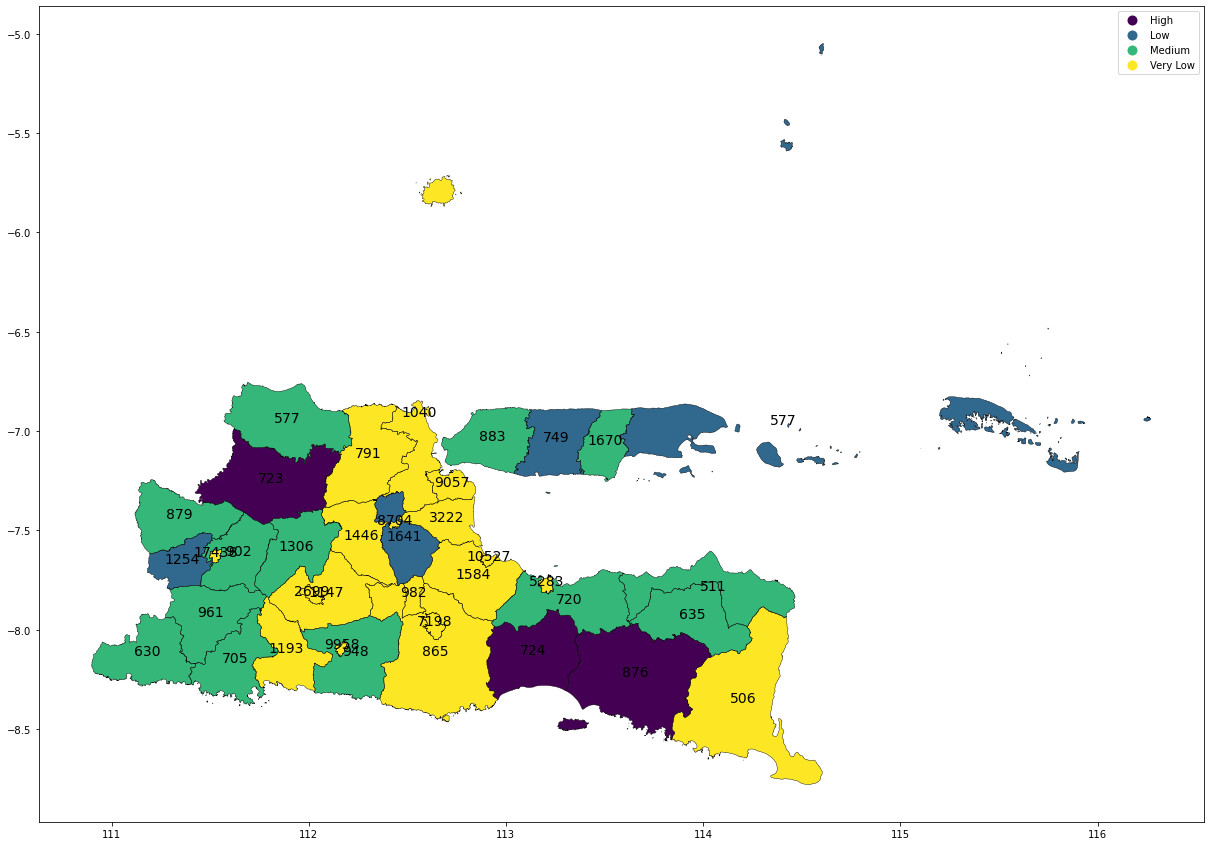

In [24]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
Jawa_Timur.apply(lambda x: ax.annotate(s= str(x.Population_Density), xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1)
Jawa_Timur.boundary.plot(ax=ax, color='Black', linewidth=.4)
image=Jawa_Timur.plot(ax=ax, column="Opportunity_Classification", legend=True,cmap='viridis', figsize=(12, 12))

In [ ]:
#ax = plt.gca()
#seg = image.Jawa_timur[Opportunity_Classification.index('High')]
#poly = Polygon(seg, facecolor='red',edgecolor='red')
#ax.add_patch(poly)

In [25]:
fig = image.get_figure()
fig.tight_layout()
fig.savefig('image3.png', dpi=800)

In [ ]:
import json

In [ ]:
merged_json = json.loads(Jawa_Timur.to_json())

In [ ]:
json_data = json.dumps(merged_json)

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[-7.24, 112.75], zoom_start=7)

folium.Choropleth(
    geo_data=Jawa_Timur,
    name="choropleth",
    data=Opportunity,
    columns=["Kabupaten", "Opportunity_flag"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Opportunity_flag",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [ ]:
conda install pillow

In [ ]:
pip install selenium

In [ ]:
import io
from PIL import Image

img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')

In [ ]:
from pprint import pprint

In [ ]:
pprint(json_data)

In [ ]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][5]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low=0, high = 250000000)
#Define custom tick labels for color bar.
tick_labels = {"0":"0","50000000":"50m","100000000":"100m","150000000":"150m","200000000":"200m","250000000":"250m"}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Opportunity Classification', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Opportunity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

In [ ]:
conda install -c conda-forge folium

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[48, -102], zoom_start=3)
m
#folium.Choropleth(
#    geo_data=Jawa_Timur,
#    name="choropleth",
 #   data=Jawa_Timur,
 #   columns=["Kabupaten", "Opportunity_Classification"],
 #   key_on="feature.id",
 #   fill_color="YlGn",
 #   fill_opacity=0.7,
 #   line_opacity=0.2,
 #   legend_name="Opportunity_Classification",
#).add_to(m)

In [ ]:
conda install basemap